Predicting Survival on the Titanic

History
Perhaps one of the most infamous shipwrecks in history, the Titanic sank after colliding with an iceberg, killing 1502 out of 2224 people on board. Interestingly, by analysing the probability of survival based on few attributes like gender, age, and social status, we can make very accurate predictions on which passengers would survive. Some groups of people were more likely to survive than others, such as women, children, and the upper-class. Therefore, we can learn about the society priorities and privileges at the time.

In [61]:
import re

# to handle datasets
import pandas as pd
import numpy as np

# for visualization
import matplotlib.pyplot as plt

# to divide train and test set
from sklearn.model_selection import train_test_split

# feature scaling
from sklearn.preprocessing import StandardScaler

# to build the models
from sklearn.linear_model import LogisticRegression

# to evaluate the models
from sklearn.metrics import accuracy_score, roc_auc_score

# to persist the model and the scaler
import joblib

# to visualise al the columns in the dataframe
pd.pandas.set_option('display.max_columns', None)

# Prepare the data set

In [62]:
# load the data - it is available open source and online

data = pd.read_csv('https://www.openml.org/data/get_csv/16826755/phpMYEkMl')

# display data
data.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29,0,0,24160,211.3375,B5,S,2,?,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.55,C22 C26,S,11,?,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2,1,2,113781,151.55,C22 C26,S,?,?,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30,1,2,113781,151.55,C22 C26,S,?,135,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25,1,2,113781,151.55,C22 C26,S,?,?,"Montreal, PQ / Chesterville, ON"


In [63]:
# replace interrogation marks by NaN values

data = data.replace('?', np.nan)

In [64]:
# retain only the first cabin if more than
# 1 are available per passenger

def get_first_cabin(row):
    try:
        return row.split()[0]
    except:
        return np.nan
    
data['cabin'] = data['cabin'].apply(get_first_cabin)

In [65]:
# extracts the title (Mr, Ms, etc) from the name variable

def get_title(passenger):
    line = passenger
    if re.search('Mrs', line):
        return 'Mrs'
    elif re.search('Mr', line):
        return 'Mr'
    elif re.search('Miss', line):
        return 'Miss'
    elif re.search('Master', line):
        return 'Master'
    else:
        return 'Other'
    
data['title'] = data['name'].apply(get_title)

In [66]:
# drop unnecessary variables

data.drop(labels=['name','ticket', 'boat', 'body','home.dest'], axis=1, inplace=True)

# display data
data.head()

,pclass,survived,sex,age,sibsp,parch,fare,cabin,embarked,title
0,1,1,female,29,0,0,211.3375,B5,S,Miss
1,1,1,male,0.9167,1,2,151.55,C22,S,Master
2,1,0,female,2,1,2,151.55,C22,S,Miss
3,1,0,male,30,1,2,151.55,C22,S,Mr
4,1,0,female,25,1,2,151.55,C22,S,Mrs


In [67]:
# cast numerical variables as floats

data['fare'] = data['fare'].astype('float')
data['age'] = data['age'].astype('float')

In [68]:
# save the data set

data.to_csv('titanic.csv', index=False)

# Data Exploration
Find numerical and categorical variables


In [69]:
target = 'survived'

In [70]:
vars_cat = [var for var in data.columns if data[var].dtype=="O"]

vars_num = [var for var in data.columns if var not in vars_cat and var!=target]
print('Number of numerical variables: {}'.format(len(vars_num)))
print('Number of categorical variables: {}'.format(len(vars_cat)))

Number of numerical variables: 5
Number of categorical variables: 4


In [71]:
# find missing values  vars in numerical variables 
num_var_with_na=[var for var in data.columns if data[var].isnull().sum()>0  and var in vars_num ]

In [72]:
# find missing values  vars in categorical  variables 
cat_var_with_na=[var for var in data.columns if data[var].isnull().sum()>0 and var in vars_cat]

In [73]:
cat_var_with_na

['cabin', 'embarked']

In [74]:
num_var_with_na

['age', 'fare']

# Cardinality

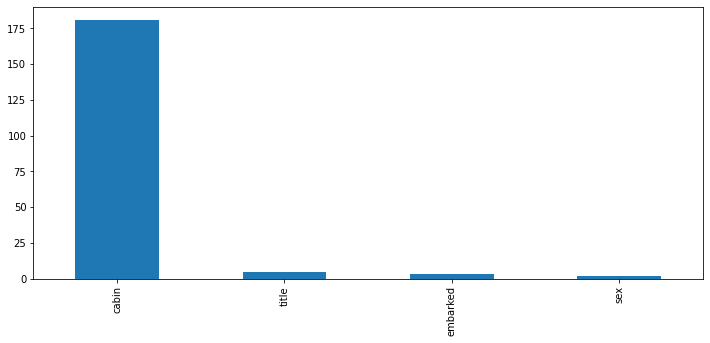

In [75]:
#we count unique categories with pandas unique() 
# and then plot them in descending order

data[vars_cat].nunique().sort_values(ascending=False).plot.bar(figsize=(12,5))

# Examine distribution of Numeric variables

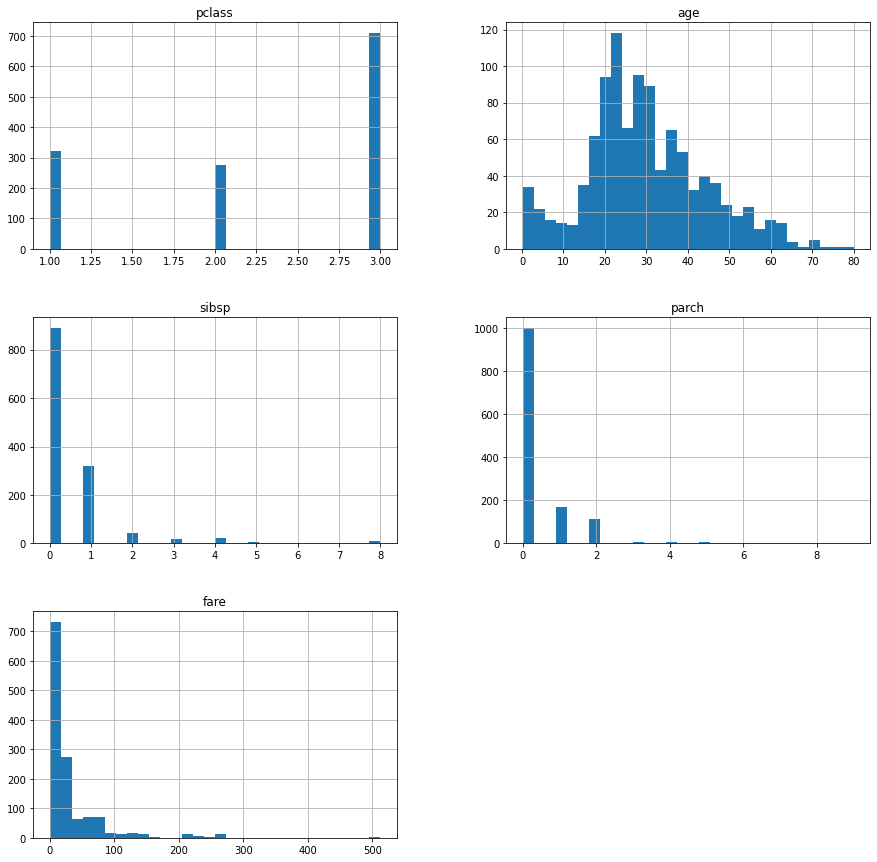

In [76]:
data[vars_num].hist(bins=30, figsize=(15,15))
plt.show()

So age and fare are continuoys variable and pclass sibsp parch are discrete so they do not have distribution.The rest of the have skewed normal distribution

# Separate data into train and test


In [77]:
X_train, X_test, y_train, y_test = train_test_split(
    data.drop('survived', axis=1),  # predictors
    data['survived'],  # target
    test_size=0.2,  # percentage of obs in test set
    random_state=0)  # seed to ensure reproducibility

X_train.shape, X_test.shape

((1047, 9), (262, 9))

# Feature Engineering


In [78]:
X_train['cabin']=X_train['cabin'].str[:1]
X_test['cabin']=X_test['cabin'].str[:1]
X_train


,pclass,sex,age,sibsp,parch,fare,cabin,embarked,title
1118,3,male,25.0000,0,0,7.9250,NaN,S,Mr
44,1,female,41.0000,0,0,134.5000,E,C,Miss
1072,3,male,NaN,0,0,7.7333,NaN,Q,Mr
1130,3,female,18.0000,0,0,7.7750,NaN,S,Miss
574,2,male,29.0000,1,0,21.0000,NaN,S,Mr
...,...,...,...,...,...,...,...,...,...
763,3,female,0.1667,1,2,20.5750,NaN,S,Miss
835,3,male,NaN,0,0,8.0500,NaN,S,Mr
1216,3,female,NaN,0,0,7.7333,NaN,Q,Miss
559,2,female,20.0000,0,0,36.7500,NaN,S,Miss


Fill in Missing data with median of the variable

In [79]:
X_train[vars_num] = X_train[vars_num].fillna(X_train[vars_num].median())

X_test[vars_num] = X_test[vars_num].fillna(X_test[vars_num].median())
X_train

,pclass,sex,age,sibsp,parch,fare,cabin,embarked,title
1118,3,male,25.0000,0,0,7.9250,NaN,S,Mr
44,1,female,41.0000,0,0,134.5000,E,C,Miss
1072,3,male,28.0000,0,0,7.7333,NaN,Q,Mr
1130,3,female,18.0000,0,0,7.7750,NaN,S,Miss
574,2,male,29.0000,1,0,21.0000,NaN,S,Mr
...,...,...,...,...,...,...,...,...,...
763,3,female,0.1667,1,2,20.5750,NaN,S,Miss
835,3,male,28.0000,0,0,8.0500,NaN,S,Mr
1216,3,female,28.0000,0,0,7.7333,NaN,Q,Miss
559,2,female,20.0000,0,0,36.7500,NaN,S,Miss


Filling Nan of categorical variables with the word missing

In [80]:
X_train[vars_cat] = X_train[vars_cat].fillna("Missing")
X_test[vars_cat] = X_test[vars_cat].fillna("Missing")
X_train

,pclass,sex,age,sibsp,parch,fare,cabin,embarked,title
1118,3,male,25.0000,0,0,7.9250,Missing,S,Mr
44,1,female,41.0000,0,0,134.5000,E,C,Miss
1072,3,male,28.0000,0,0,7.7333,Missing,Q,Mr
1130,3,female,18.0000,0,0,7.7750,Missing,S,Miss
574,2,male,29.0000,1,0,21.0000,Missing,S,Mr
...,...,...,...,...,...,...,...,...,...
763,3,female,0.1667,1,2,20.5750,Missing,S,Miss
835,3,male,28.0000,0,0,8.0500,Missing,S,Mr
1216,3,female,28.0000,0,0,7.7333,Missing,Q,Miss
559,2,female,20.0000,0,0,36.7500,Missing,S,Miss


Remove rare labels in categorical variable

In [81]:
def find_frequent_labels(data, var, rare_perc):
    
    # function finds the labels that are shared by more than
    # a certain % of the houses in the dataset

    data = data.copy()

    tmp = data.groupby(var)[var].count() / len(data)

    return tmp[tmp > rare_perc].index


for var in vars_cat:
    
    # find the frequent categories
    frequent_ls = find_frequent_labels(X_train, var, 0.05)
    
    print(var, frequent_ls)
    print()
    
    # replace rare categories by the string "Rare"
    X_train[var] = np.where(X_train[var].isin(
        frequent_ls), X_train[var], 'Rare')
    
    X_test[var] = np.where(X_test[var].isin(
        frequent_ls), X_test[var], 'Rare')

sex Index(['female', 'male'], dtype='object', name='sex')

cabin Index(['C', 'Missing'], dtype='object', name='cabin')

embarked Index(['C', 'Q', 'S'], dtype='object', name='embarked')

title Index(['Miss', 'Mr', 'Mrs'], dtype='object', name='title')



**One hot encoding of categorical variables into k-1 binary variables**

In [82]:
for var in vars_cat:
    
    # to create the binary variables, we use get_dummies from pandas
    
    X_train = pd.concat([X_train,
                         pd.get_dummies(X_train[var], prefix=var, drop_first=True)
                         ], axis=1)
    
    X_test = pd.concat([X_test,
                        pd.get_dummies(X_test[var], prefix=var, drop_first=True)
                        ], axis=1)
    

X_train.drop(labels=vars_cat, axis=1, inplace=True)
X_test.drop(labels=vars_cat, axis=1, inplace=True)

X_train.shape, X_test.shape

((1047, 14), (262, 13))

In [83]:
X_train.head()

,pclass,age,sibsp,parch,fare,sex_male,cabin_Missing,cabin_Rare,embarked_Q,embarked_Rare,embarked_S,title_Mr,title_Mrs,title_Rare
1118,3,25.0,0,0,7.9250,1,1,0,0,0,1,1,0,0
44,1,41.0,0,0,134.5000,0,0,1,0,0,0,0,0,0
1072,3,28.0,0,0,7.7333,1,1,0,1,0,0,1,0,0
1130,3,18.0,0,0,7.7750,0,1,0,0,0,1,0,0,0
574,2,29.0,1,0,21.0000,1,1,0,0,0,1,1,0,0


In [84]:
X_test.head()

,pclass,age,sibsp,parch,fare,sex_male,cabin_Missing,cabin_Rare,embarked_Q,embarked_S,title_Mr,title_Mrs,title_Rare
1139,3,38.0,0,0,7.8958,1,1,0,0,1,1,0,0
533,2,21.0,0,1,21.0000,0,1,0,0,1,0,0,0
459,2,42.0,1,0,27.0000,1,1,0,0,1,1,0,0
1150,3,26.0,0,0,14.5000,1,1,0,0,1,1,0,0
393,2,25.0,0,0,31.5000,1,1,0,0,1,1,0,0


In [85]:
# we add 0 as values for all the observations, as Rare
# was not present in the test set

X_test['embarked_Rare'] = 0

In [86]:
# Note that now embarked_Rare will be at the end of the test set
# so in order to pass the variables in the same order, we will
# create a variables variable:

variables = [c  for c in X_train.columns]

variables

['pclass',
 'age',
 'sibsp',
 'parch',
 'fare',
 'sex_male',
 'cabin_Missing',
 'cabin_Rare',
 'embarked_Q',
 'embarked_Rare',
 'embarked_S',
 'title_Mr',
 'title_Mrs',
 'title_Rare']

**Scaling with standard Scaler**

In [87]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X_train[variables]) 
X_train = scaler.transform(X_train[variables])
X_test = scaler.transform(X_test[variables])

# Train the Logistic Regression model

In [88]:

# set up the model
# set the random_state / seed so as not to produce different random outcomes

model = LogisticRegression(C=0.0005, random_state=0)

# train the model
model.fit(X_train, y_train)

LogisticRegression(C=0.0005, random_state=0)

# Predictions and evaluate model performance

In [91]:
predictions=model.predict(X_test)
predictions

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

**Accuracy**

In [94]:
# make predictions for test set
class_ = model.predict(X_train)
pred = model.predict_proba(X_train)[:,1]

# determine mse and rmse
print('train roc-auc: {}'.format(roc_auc_score(y_train, pred)))
print('train accuracy: {}'.format(accuracy_score(y_train, class_)))
print()

# make predictions for test set
class_ = model.predict(X_test)
pred = model.predict_proba(X_test)[:,1]

# determine mse and rmse
print('test roc-auc: {}'.format(roc_auc_score(y_test, pred)))
print('test accuracy: {}'.format(accuracy_score(y_test, class_)))
print()

train roc-auc: 0.8421000772797527
train accuracy: 0.6179560649474689

test roc-auc: 0.8441975308641976
test accuracy: 0.6183206106870229

